In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def draw(x1, x2):
    line = plt.plot(x1, x2)

def sigmoid(score):
    return 1 / (1 + np.exp(-score))

def calculate_error(line_params, points, y): # y is the labels
    m = points.shape[0]
    p = sigmoid(points * line_params)
    cross_entropy = -(1 / m) * (np.log(p).T * y + np.log(1 - p).T * (1 - y))
    return cross_entropy

def gradient_descent(line_params, points, y, alpha):
    m = points.shape[0]
    for i in range(500):
        p = sigmoid(points * line_params)
        gradient = points.T * (p - y) * (alpha / m)
        line_params = line_params - gradient
        w1 = line_params.item(0)
        w2 = line_params.item(1)
        b = line_params.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()]) # range of data for x1 and x2
        x2 = -b / w2 + x1 * (-w1 / w2)
    draw(x1, x2)


In [41]:
# generate two data sets
num_points = 100
np.random.seed(0)

# array structure = Array<[x, y, bias]>
bias_array = np.ones(num_points)
top_region = np.array([np.random.normal(10, 2, num_points), np.random.normal(12, 2, num_points), bias_array]).T
bottom_region = np.array([np.random.normal(5, 2, num_points), np.random.normal(6, 2, num_points), bias_array]).T
all_points = np.vstack((top_region, bottom_region))
y = np.array([np.zeros(num_points), np.ones(num_points)]).reshape(num_points * 2, 1)

# define default line w1(x1) + w2(x2) + b = 0
line_params = np.matrix(np.zeros(3)).T

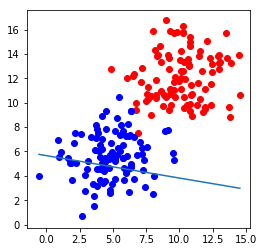

In [42]:
# plot data
_, ax = plt.subplots(figsize=(4, 4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
gradient_descent(line_params, all_points, y, 0.01)
plt.show()

In [39]:
print(calculate_error(line_params, all_points, y))

[[-0.]]
